In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/Number Plate Recognition App/Plate Detection

/content/drive/MyDrive/Number Plate Recognition App/Plate Detection


In [5]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [7]:
!yolo detect predict model= yolov8l.pt source="https://ultralytics.com/images/bus.jpg"

100% 83.7M/83.7M [00:00<00:00, 182MB/s]
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

100% 476k/476k [00:00<00:00, 90.6MB/s]
image 1/1 /content/drive/MyDrive/Number Plate Recognition App/Plate Detection/bus.jpg: 640x480 5 persons, 1 bicycle, 1 bus, 137.9ms
Speed: 12.8ms preprocess, 137.9ms inference, 3566.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


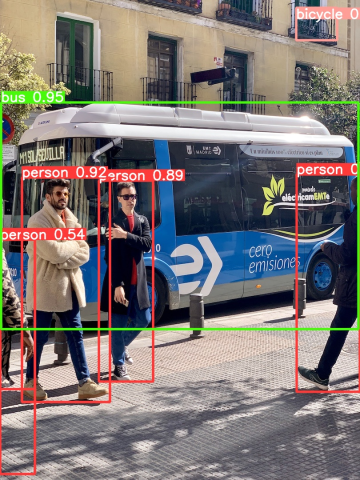

In [9]:
import cv2
import imutils
from google.colab.patches import cv2_imshow
img_path="runs/detect/predict/bus.jpg"
img=cv2.imread(img_path)
img = imutils.resize(img,width=360)

cv2_imshow(img)

Python Implementation

In [10]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


0: 640x480 4 persons, 1 bus, 48.1ms
Speed: 2.2ms preprocess, 48.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)


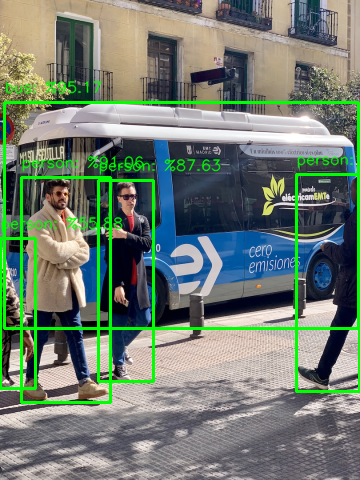

In [15]:
img_path="bus.jpg"
model_path="yolov8l.pt"

font=cv2.FONT_HERSHEY_SIMPLEX

model= YOLO(model_path)
img =cv2.imread(img_path)
img = imutils.resize(img,width=360)

results= model(img)[0]

threshold = 0.5
for result in results.boxes.data.tolist():
  x1,y1,x2,y2,score,class_id=result
  x1,y1,x2,y2,class_id = int(x1),int(y1),int(x2),int(y2),int(class_id)
  if score >threshold:
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
    class_name = results.names[class_id]
    score=score*100

    text= f"{class_name}: %{score:.2f}"
    cv2.putText(img,text,(x1,y1-10),font,0.5,(0,255,0),1, cv2.LINE_AA)

cv2_imshow(img)

Datset


In [16]:
!unzip data/plate_dataset.zip -d ./data

Archive:  data/plate_dataset.zip
   creating: ./data/plate_dataset/images/
   creating: ./data/plate_dataset/images/test/
  inflating: ./data/plate_dataset/images/test/108.jpg  
  inflating: ./data/plate_dataset/images/test/130.jpg  
  inflating: ./data/plate_dataset/images/test/145.jpg  
  inflating: ./data/plate_dataset/images/test/151.jpg  
  inflating: ./data/plate_dataset/images/test/165.jpg  
  inflating: ./data/plate_dataset/images/test/169.jpg  
  inflating: ./data/plate_dataset/images/test/180.jpg  
  inflating: ./data/plate_dataset/images/test/201.jpg  
  inflating: ./data/plate_dataset/images/test/203.jpg  
  inflating: ./data/plate_dataset/images/test/205.jpg  
  inflating: ./data/plate_dataset/images/test/206.jpg  
  inflating: ./data/plate_dataset/images/test/240.jpg  
  inflating: ./data/plate_dataset/images/test/241.jpg  
  inflating: ./data/plate_dataset/images/test/243.jpg  
  inflating: ./data/plate_dataset/images/test/247.jpg  
  inflating: ./data/plate_dataset/imag

Train

In [18]:
!yolo detect train data=data/config.yaml model=yolov8n.pt epochs=100 patience=30 imgsz =640 workers=8 batch=12  device =0 name=yolov8n-plate-detection

100% 6.23M/6.23M [00:00<00:00, 159MB/s]
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/config.yaml, epochs=100, time=None, patience=30, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8n-plate-detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [ ]:
#!yolo detect train model="runs/detect/yolov8n-plate-detection/weights/last.pt" resume=True

Prediction


In [19]:
!yolo detect predict model=runs/detect/yolov8n-plate-detection/weights/best.pt  source=data/plate_dataset/images/test save=True


Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/30 /content/drive/MyDrive/Number Plate Recognition App/Plate Detection/data/plate_dataset/images/test/108.jpg: 416x640 1 licence_plate, 97.0ms
image 2/30 /content/drive/MyDrive/Number Plate Recognition App/Plate Detection/data/plate_dataset/images/test/130.jpg: 512x640 3 licence_plates, 101.5ms
image 3/30 /content/drive/MyDrive/Number Plate Recognition App/Plate Detection/data/plate_dataset/images/test/145.jpg: 480x640 2 licence_plates, 98.7ms
image 4/30 /content/drive/MyDrive/Number Plate Recognition App/Plate Detection/data/plate_dataset/images/test/151.jpg: 352x640 (no detections), 93.8ms
image 5/30 /content/drive/MyDrive/Number Plate Recognition App/Plate Detection/data/plate_dataset/images/test/165.jpg: 384x640 1 licence_plate, 97.2ms
image 6/30 /content/drive/MyDrive/Number Plate Recognition App/Plate Detect

Python Implemention Custom Models

In [20]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


0: 416x640 1 licence_plate, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


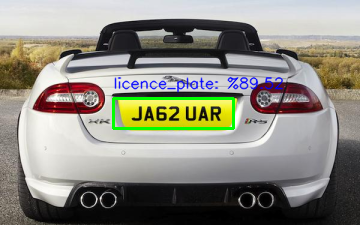

In [22]:
img_path="data/plate_dataset/images/test/108.jpg"
model_path="runs/detect/yolov8n-plate-detection/weights/best.pt"

font=cv2.FONT_HERSHEY_SIMPLEX

model= YOLO(model_path)
img =cv2.imread(img_path)
img = imutils.resize(img,width=360)

results= model(img)[0]

threshold = 0.5
for result in results.boxes.data.tolist():
  x1,y1,x2,y2,score,class_id=result
  x1,y1,x2,y2,class_id = int(x1),int(y1),int(x2),int(y2),int(class_id)
  if score >threshold:
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
    class_name = results.names[class_id]
    score=score*100

    text= f"{class_name}: %{score:.2f}"
    cv2.putText(img,text,(x1,y1-10),font,0.5,(255,0,0),1, cv2.LINE_AA)

cv2_imshow(img)